<a href="https://colab.research.google.com/github/giovannifarlley/data-science-from-scrath/blob/master/reconhecimento_digitos_rnc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import keras
import tensorflow as tf
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras import backend as K
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [0]:
batch_size = 64
num_classes = 10
epochs = 18
img_rows, img_cols = 36, 36
imput_shape = (28, 28, 1)

In [0]:
training = pd.read_csv("/content/train.csv")

In [0]:
test = training["label"]
training.drop(["label"], inplace = True, axis = 1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(training.values, test.values, test_size=0.2 , random_state=42)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28 , 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28 , 1).astype('float32')

In [0]:
x_train /= 255
x_test /= 255

In [16]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (33600, 28, 28, 1)
33600 train samples
8400 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))

In [0]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

In [0]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.21))
model.add(Dense(num_classes, activation='relu'))

In [0]:
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.22))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='relu'))

In [0]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [25]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/18
33600/33600 [==============================] - 117s 3ms/step - loss: 1.0804 - acc: 0.5317 - val_loss: 0.2352 - val_acc: 0.9488
Epoch 2/18
33600/33600 [==============================] - 115s 3ms/step - loss: 0.1779 - acc: 0.9565 - val_loss: 0.1185 - val_acc: 0.9743
Epoch 3/18
33600/33600 [==============================] - 116s 3ms/step - loss: 0.0962 - acc: 0.9775 - val_loss: 0.0640 - val_acc: 0.9836
Epoch 4/18
33600/33600 [==============================] - 115s 3ms/step - loss: 0.0699 - acc: 0.9829 - val_loss: 0.0745 - val_acc: 0.9827
Epoch 5/18
33600/33600 [==============================] - 115s 3ms/step - loss: 0.0573 - acc: 0.9860 - val_loss: 0.0775 - val_acc: 0.9836
Epoch 6/18
33600/33600 [==============================] - 116s 3ms/step - loss: 0.0489 - acc: 0.9881 - val_loss: 0.0827 - val_acc: 0.9811
Epoch 7/18
33600/33600 [==============================] - 114s 3ms/step - loss: 0.0437 - acc: 0.9892 - val_loss: 0.0675 - v

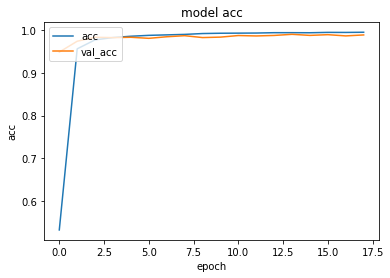

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')

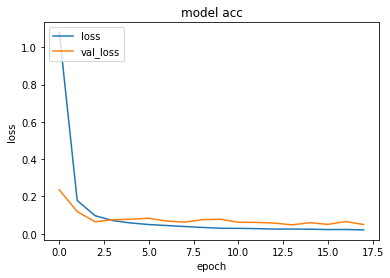

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output

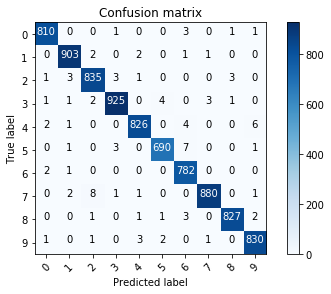

In [30]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
Y_true = np.argmax(y_test, axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [0]:
test = np.array(pd.read_csv("/content/test.csv"))
test_input = test.reshape(test.shape[0], 28, 28 , 1).astype('float32')
Y_pred = model.predict(test_input)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 

submissions=pd.DataFrame({"ImageId": list(range(1,len(Y_pred_classes)+1)),
                         "Label": Y_pred_classes})
submissions.to_csv("/content/submissions.csv", index=False, header=True)

In [0]:
model.save('/content/model_1.h5')
json_string = model.to_json()

In [33]:
submissions

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,1
6,7,0
7,8,3
8,9,0
9,10,3
